## Train and Prediction on all data

Using rotated to hz + OpenCv border

Basic default transforms

Using data with wrap instead of border_reflect_101 and imgaug to add classes

Note we dont use aug on irregular metal

valid only

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import geopandas as gpd
from resizeimage import resizeimage
import datetime
import uuid
from os import listdir
from os.path import isfile, join

In [3]:
torch.cuda.set_device(2)
torch.cuda.current_device()

2

In [4]:
data_dir = Path('data')

In [5]:
RETRAIN = True
RESIZE_IMAGES = True

In [6]:
MODEL_NAME='cv_reflect_imgaug'

In [7]:
NB_NUM='05_5'

In [8]:
DATE = datetime.datetime.today().strftime('%Y%m%d')
UID=str(uuid.uuid4())[:8]
print(f'UID: {UID}, DATE: {DATE}')                                                 

UID: 7e825531, DATE: 20191110


In [9]:
#DATE ='20191028'
#UID='77dc216d'

In [10]:
SUB_NUM='17'

In [11]:
img_size=256

In [12]:
train_images=data_dir/f'train/rotated/clipped/reflect/{img_size}'
test_images=data_dir/f'test/rotated/clipped/reflect/{img_size}'

In [13]:
test_names = get_image_files(test_images)

In [14]:
assert len(test_names)==7325

In [15]:
df_all=pd.read_csv(data_dir/'df_train_all.csv')

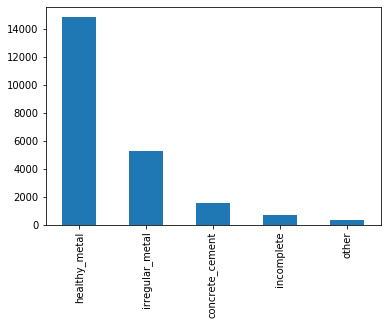

In [16]:
df_all['roof_material'].value_counts().plot(kind='bar')

In [18]:
df_v=df_all.loc[df_all['verified'] == True]

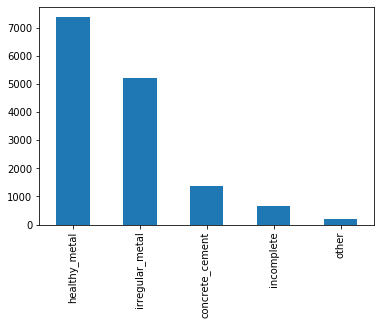

In [19]:
df_v['roof_material'].value_counts().plot(kind='bar')

In [20]:
df_aug=pd.read_csv(data_dir/'df_aug_reflect.csv')

In [21]:
len(df_aug)

171253

In [22]:
df_aug.tail()

,id,roof_material,verified,country,region
171248,7a214bda_imgaug_9_1005,concrete_cement,True,colombia,borde_rural
171249,7a2bfa30_imgaug_7_5683,healthy_metal,True,colombia,borde_soacha
171250,7a3dc152_imgaug_3_1483,healthy_metal,True,colombia,borde_rural
171251,7a3c9b10_imgaug_4_5386,healthy_metal,True,colombia,borde_soacha
171252,7a20854c_imgaug_7_14480,healthy_metal,True,st_lucia,dennery


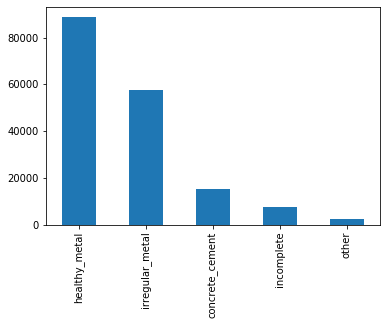

In [23]:
df_aug['roof_material'].value_counts().plot(kind='bar')

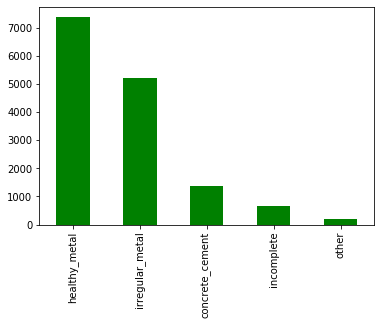

In [24]:
df_v['roof_material'].value_counts().plot(kind='bar', color='green')

In [25]:
df_img=df_aug[df_aug.id.str.contains('imgaug')]

In [26]:
len(df_img)

148700

In [27]:
df_irreg_aug=df_img.loc[df_img['roof_material'] == 'irregular_metal']

In [28]:
df_healthy_aug=df_img.loc[df_img['roof_material'] == 'healthy_metal']

In [29]:
df_concrete_aug=df_img.loc[df_img['roof_material'] == 'concrete_cement']

In [30]:
df_incomplete_aug=df_img.loc[df_img['roof_material'] == 'incomplete']

In [31]:
df_other_aug=df_img.loc[df_img['roof_material'] == 'other']

In [32]:
len(df_irreg_aug)

52410

In [33]:
len(df_healthy_aug)

73810

In [34]:
len(df_concrete_aug)

13870

In [35]:
len(df_incomplete_aug)

6680

In [36]:
len(df_other_aug)

1930

In [37]:
### append a fixed number eg 1000 images to each class

In [38]:
df_irreg_aug = df_irreg_aug.sample(n=1000)
assert len(df_irreg_aug)==1000
df_irreg_aug.head()

,id,roof_material,verified,country,region
53254,7a31debe_imgaug_5_13475,irregular_metal,True,guatemala,mixco_1_and_ebenezer
75360,7a228252_imgaug_7_12709,irregular_metal,True,guatemala,mixco_1_and_ebenezer
128781,7a43f270_imgaug_9_9455,irregular_metal,True,colombia,borde_soacha
115586,7a31a03e_imgaug_5_528,irregular_metal,True,colombia,borde_rural
141042,7a2d6dde_imgaug_3_12039,irregular_metal,True,guatemala,mixco_1_and_ebenezer


In [39]:
df_healthy_aug = df_healthy_aug.sample(n=1000)
assert len(df_healthy_aug)==1000
df_healthy_aug.head()

,id,roof_material,verified,country,region
59190,7a3069a8_imgaug_3_11971,healthy_metal,True,guatemala,mixco_1_and_ebenezer
41307,7a1f6d06_imgaug_9_2076,healthy_metal,True,colombia,borde_rural
158578,7a2c00ca_imgaug_2_7620,healthy_metal,True,colombia,borde_soacha
49216,7a3d1036_imgaug_1_8974,healthy_metal,True,colombia,borde_soacha
100111,7a1dbc18_imgaug_8_12443,healthy_metal,True,guatemala,mixco_1_and_ebenezer


In [40]:
df_concrete_aug=df_concrete_aug.sample(n=1000)
assert len(df_concrete_aug)==1000
df_concrete_aug.head()

,id,roof_material,verified,country,region
134685,7a2dc69e_imgaug_1_11034,concrete_cement,True,guatemala,mixco_1_and_ebenezer
99331,7a3f9c2a_imgaug_3_9483,concrete_cement,True,colombia,borde_soacha
144152,7a40b420_imgaug_7_10436,concrete_cement,True,guatemala,mixco_1_and_ebenezer
116396,7a3ecf8e_imgaug_9_11372,concrete_cement,True,guatemala,mixco_1_and_ebenezer
170593,7a1ed850_imgaug_4_13738,concrete_cement,True,guatemala,mixco_3


In [41]:
df_incomplete_aug=df_incomplete_aug.sample(n=1000)
assert len(df_incomplete_aug)==1000
df_incomplete_aug.head()

,id,roof_material,verified,country,region
84217,7a312e06_imgaug_8_1775,incomplete,True,colombia,borde_rural
88236,7a30ebd0_imgaug_8_6609,incomplete,True,colombia,borde_soacha
88902,7a40f804_imgaug_8_6993,incomplete,True,colombia,borde_soacha
153173,7a329584_imgaug_2_768,incomplete,True,colombia,borde_rural
37902,7a3f4806_imgaug_3_4946,incomplete,True,colombia,borde_soacha


In [42]:
df_v.head()

,id,roof_material,verified,country,region
0,7a3f2a10,concrete_cement,True,colombia,borde_rural
1,7a1f731e,irregular_metal,True,colombia,borde_rural
2,7a424ad8,healthy_metal,True,colombia,borde_rural
3,7a3edc5e,healthy_metal,True,colombia,borde_rural
4,7a303a6e,healthy_metal,True,colombia,borde_rural


In [43]:
df_other_aug=df_other_aug.sample(n=1000)
assert len(df_other_aug)==1000
df_other_aug.head()

,id,roof_material,verified,country,region
77241,7a3b47e2_imgaug_6_12861,other,True,guatemala,mixco_1_and_ebenezer
23722,7a37d666_imgaug_3_13941,other,True,st_lucia,dennery
121176,7a2f1224_imgaug_0_13840,other,True,guatemala,mixco_3
29186,7a2c3b76_imgaug_2_12770,other,True,guatemala,mixco_1_and_ebenezer
117018,7a24eaec_imgaug_2_11837,other,True,guatemala,mixco_1_and_ebenezer


#### concat

In [44]:
len(df_v)

14870

In [45]:
frames = [df_irreg_aug, df_healthy_aug, df_concrete_aug, df_incomplete_aug, df_other_aug]

In [46]:
df_all_aug = pd.concat(frames)

In [47]:
assert len(df_all_aug)==5000

In [48]:
df_all_aug = df_v.append(df_all_aug, ignore_index=True)

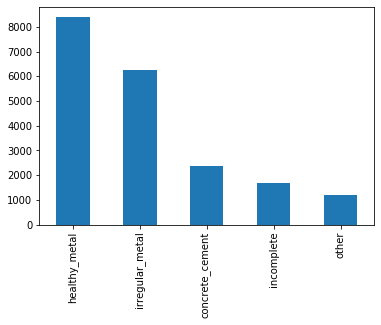

In [51]:
df_all_aug['roof_material'].value_counts().plot(kind='bar')

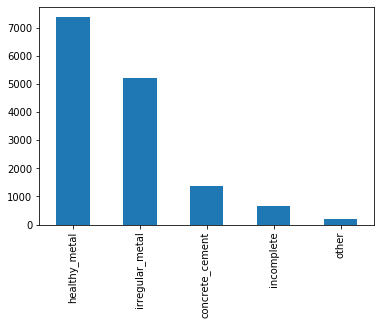

In [50]:
df_v['roof_material'].value_counts().plot(kind='bar')

#### test data

In [52]:
df_test=pd.read_csv(data_dir/'df_test_all.csv')

In [53]:
df_test.tail()

,id,country,region
7320,7a4f3ff4,st_lucia,dennery
7321,7a4fc578,st_lucia,dennery
7322,7a4ac7b2,st_lucia,dennery
7323,7a47e25e,st_lucia,dennery
7324,7a4e3f78,st_lucia,dennery


In [54]:
assert len(df_test)==7325

In [55]:
df_all_aug.loc[df_all_aug['id'] == '7a204ec4']

,id,roof_material,verified,country,region
12960,7a204ec4,irregular_metal,True,guatemala,mixco_1_and_ebenezer


In [56]:
len(df_all_aug)

19870

To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

In [57]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

### setup dataset

In [58]:
np.random.seed(42)
dep_var='roof_material'
src = (ImageList.from_df(path=train_images, df=df_all_aug, cols='id', suffix='.tif')
       .split_by_rand_pct(0.2)
      .label_from_df(cols=dep_var)
      .add_test_folder(test_images))

In [59]:
data = (src.transform(tfms, size=img_size)
        .databunch().normalize(imagenet_stats))

In [60]:
#to check what params object has
#dir(data)

In [61]:
data.label_list

LabelLists;

Train: LabelList (15896 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal,healthy_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (3974 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
incomplete,healthy_metal,healthy_metal,incomplete,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256

In [62]:
data.loss_func

FlattenedLoss of CrossEntropyLoss()

`show_batch` still works, and show us the different labels separated by `;`.

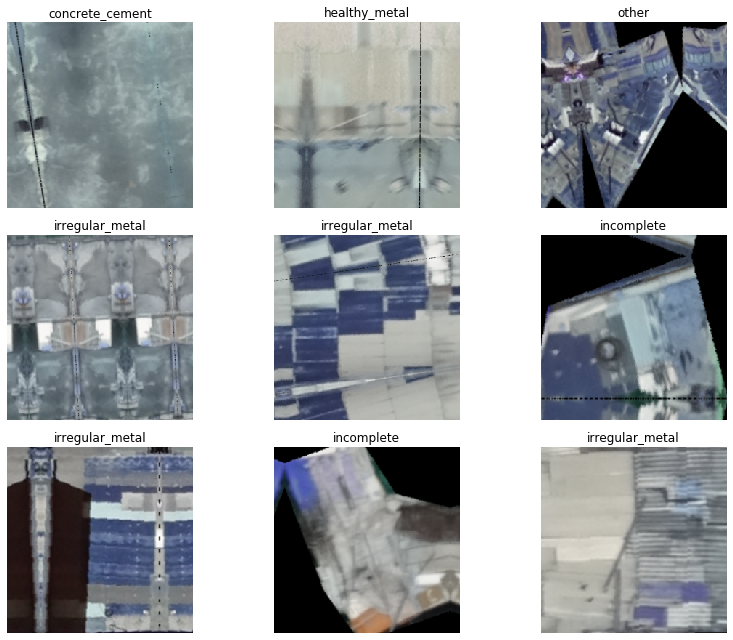

In [63]:
data.show_batch(rows=3, figsize=(12,9))

### Model

In [64]:
arch = models.resnet50
arch_name = 'rn50'

In [65]:
learn = cnn_learner(data, arch, metrics=error_rate, bn_final=True).to_fp16()

### Train model

In [66]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


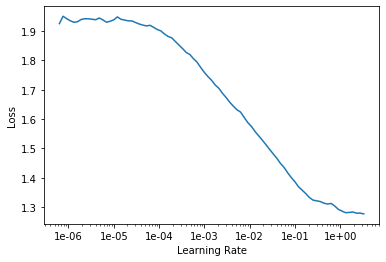

In [67]:
learn.recorder.plot()

Then we can fit the head of our network.

In [68]:
lr = 1e-2

In [69]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.829031,0.668091,0.244841,00:52
1,0.627840,0.558931,0.209864,00:52
2,0.548591,0.505948,0.197031,00:52
3,0.496495,0.472447,0.178158,00:52
4,0.460498,0.466842,0.177403,00:51


In [70]:
learn.save(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

#### Load model

In [71]:
learn.load(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (15896 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal,healthy_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (3974 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
incomplete,healthy_metal,healthy_metal,incomplete,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode

In [72]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('irregular_metal', 'healthy_metal', 200),
 ('healthy_metal', 'irregular_metal', 159),
 ('incomplete', 'irregular_metal', 127),
 ('concrete_cement', 'healthy_metal', 31),
 ('irregular_metal', 'concrete_cement', 23),
 ('incomplete', 'concrete_cement', 22),
 ('concrete_cement', 'irregular_metal', 21),
 ('concrete_cement', 'incomplete', 18),
 ('healthy_metal', 'concrete_cement', 17),
 ('incomplete', 'healthy_metal', 17),
 ('other', 'irregular_metal', 17),
 ('irregular_metal', 'incomplete', 14),
 ('other', 'healthy_metal', 11),
 ('healthy_metal', 'other', 8),
 ('irregular_metal', 'other', 7),
 ('healthy_metal', 'incomplete', 5),
 ('concrete_cement', 'other', 3),
 ('incomplete', 'other', 2),
 ('other', 'concrete_cement', 2)]

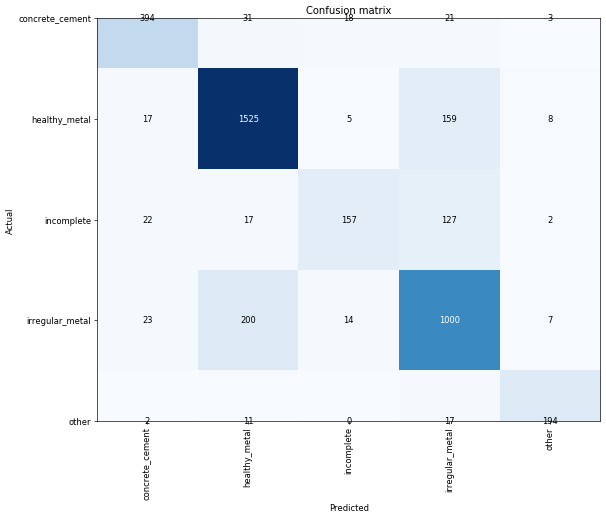

In [73]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

### Re-train

In [74]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


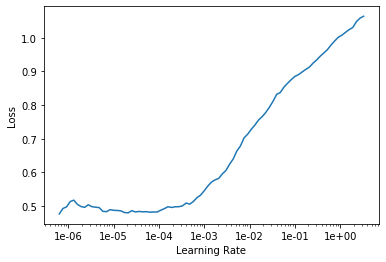

In [75]:
learn.lr_find()
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(5, slice(2e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.483638,0.475303,0.180171,01:04
1,0.478579,0.457176,0.172370,01:04
2,0.417325,0.436185,0.167338,01:05
3,0.343297,0.398622,0.149723,01:06
4,0.294119,0.393724,0.149220,01:06


In [77]:
learn.save(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

In [78]:
learn.load(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (15896 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal,healthy_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (3974 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
incomplete,healthy_metal,healthy_metal,incomplete,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode

In [79]:
learn.fit_one_cycle(5, slice(2e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.318166,0.405184,0.156769,01:05
1,0.364534,0.402417,0.156517,01:04
2,0.303896,0.385949,0.137393,01:04
3,0.224954,0.372060,0.138400,01:17
4,0.188460,0.378332,0.135380,01:18


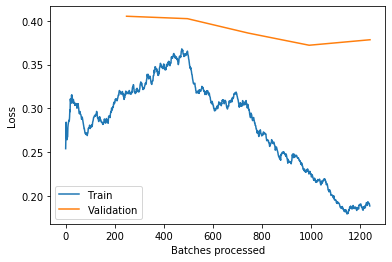

In [80]:
learn.recorder.plot_losses()

In [81]:
learn.save(f'stage-2_1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

### fp32

In [82]:
learn.load(f'stage-2_1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (15896 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal,healthy_metal,healthy_metal,healthy_metal,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Valid: LabelList (3974 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
incomplete,healthy_metal,healthy_metal,incomplete,healthy_metal
Path: data/train/rotated/clipped/reflect/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train/rotated/clipped/reflect/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode

In [83]:
learn = learn.to_fp32()

In [84]:
learn.export(f'stage-2_1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.pkl')

In [85]:
learn.export()

### inference

In [86]:
#test_images=data_dir/f'test/rotated/clipped/{img_size}'
test_dataset=ImageList.from_folder(test_images)

In [87]:
len(test_dataset)

7325

In [88]:
learn = load_learner(path=data_dir/f'train/rotated/clipped/reflect/{img_size}', test=test_dataset)

In [89]:
learn.data.loss_func

FlattenedLoss of CrossEntropyLoss()

In [90]:
type(learn.data)

fastai.vision.data.ImageDataBunch

In [91]:
type(learn.dl(DatasetType.Test))

fastai.basic_data.DeviceDataLoader

In [92]:
len(learn.dl(DatasetType.Test))

115

Get number of items in the Valid dataset (in DeviceDataLoader)

In [93]:
#assert len(learn.dl(DatasetType.Test).dl)==7325

Required format:
    
<pre>
id	concrete_cement	healthy_metal	incomplete	irregular_metal	other
7a4d630a	0.9	0	0	0	0
7a4bbbd6	0.9	0	0	0	0
7a4ac744	0.9	0	0	0	0
7a4881fa	0.9	0	0	0	0
7a4aa4a8	0.9	0	0	0	0
</pre>


In [94]:
preds,y= learn.get_preds(ds_type=DatasetType.Test)

In [95]:
labels = np.argmax(preds, 1)

In [96]:
len(preds)

7325

In [97]:
preds[0].tolist()

[0.05139024555683136,
 0.9431493282318115,
 0.002855672501027584,
 0.0017908148001879454,
 0.0008139104465954006]

In [98]:
preds_list=[]
for pred in preds:
    preds_list.append(pred.tolist())

In [99]:
len(labels)

7325

In [100]:
learn.data.classes

['concrete_cement', 'healthy_metal', 'incomplete', 'irregular_metal', 'other']

In [101]:
data.classes

['concrete_cement', 'healthy_metal', 'incomplete', 'irregular_metal', 'other']

In [102]:
test_predictions = [learn.data.classes[int(x)] for x in labels]

In [103]:
test_predictions[0]

'healthy_metal'

In [104]:
type(learn.data.test_ds)

fastai.data_block.LabelList

In [105]:
 learn.data.test_ds.x.items

array([PosixPath('data/test/rotated/clipped/reflect/256/7a4d9168.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a4ae922.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a48ca98.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a49c614.tif'), ...,
       PosixPath('data/test/rotated/clipped/reflect/256/7a486800.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a4c49fc.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a501f50.tif'),
       PosixPath('data/test/rotated/clipped/reflect/256/7a4d27b4.tif')], dtype=object)

In [106]:
ids=[]
for item in learn.data.test_ds.x.items:
    base, id = os.path.split(item)
    id = id.split('.tif')[0]
    ids.append(id)

In [107]:
preds_list[0]

[0.05139024555683136,
 0.9431493282318115,
 0.002855672501027584,
 0.0017908148001879454,
 0.0008139104465954006]

In [108]:
cols = learn.data.classes.copy()
cols.insert(0,'id')
df = pd.DataFrame(list(zip(ids, preds_list)), 
               columns =['id', 'pred']) 

In [109]:
cols

['id',
 'concrete_cement',
 'healthy_metal',
 'incomplete',
 'irregular_metal',
 'other']

In [110]:
df.head()

,id,pred
0,7a4d9168,"[0.05139024555683136, 0.9431493282318115, 0.00..."
1,7a4ae922,"[0.003999555949121714, 0.9450036287307739, 0.0..."
2,7a48ca98,"[0.005816816817969084, 0.13044966757297516, 0...."
3,7a49c614,"[0.001503460225649178, 0.9818622469902039, 0.0..."
4,7a4dd4f2,"[0.0031581097282469273, 0.9137178659439087, 0...."


In [111]:
pred_df = pd.DataFrame(df['pred'].values.tolist())

In [112]:
pred_df.insert(loc=0, column='id', value=ids)

In [113]:
pred_df.columns = cols

In [114]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d9168,0.051390,0.943149,0.002856,0.001791,0.000814
1,7a4ae922,0.004000,0.945004,0.001179,0.049415,0.000403
2,7a48ca98,0.005817,0.130450,0.008704,0.851831,0.003198
3,7a49c614,0.001503,0.981862,0.001453,0.014633,0.000548
4,7a4dd4f2,0.003158,0.913718,0.004825,0.073772,0.004527


Required format:
    
<pre>
id	concrete_cement	healthy_metal	incomplete	irregular_metal	other
7a4d630a	0.9	0	0	0	0
7a4bbbd6	0.9	0	0	0	0
7a4ac744	0.9	0	0	0	0
7a4881fa	0.9	0	0	0	0
7a4aa4a8	0.9	0	0	0	0
</pre>


In [117]:
pred_ids=pred_df['id'].values.tolist()

In [118]:
df_baseline = pd.read_csv(data_dir/f'submissions/mean_baseline.csv')

In [119]:
df_baseline.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d630a,0.093275,0.496369,0.044923,0.352455,0.012979
1,7a4bbbd6,0.093275,0.496369,0.044923,0.352455,0.012979
2,7a4ac744,0.093275,0.496369,0.044923,0.352455,0.012979
3,7a4881fa,0.093275,0.496369,0.044923,0.352455,0.012979
4,7a4aa4a8,0.093275,0.496369,0.044923,0.352455,0.012979


In [120]:
baseline_ids=df_baseline['id'].values.tolist()

In [122]:
assert set(pred_ids)==set(baseline_ids)

#### sort by baseline ids

In [123]:
pred_df['id_cat'] = pd.Categorical(
    pred_df['id'], 
    categories=baseline_ids, 
    ordered=True
)

In [124]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other,id_cat
0,7a4d9168,0.051390,0.943149,0.002856,0.001791,0.000814,7a4d9168
1,7a4ae922,0.004000,0.945004,0.001179,0.049415,0.000403,7a4ae922
2,7a48ca98,0.005817,0.130450,0.008704,0.851831,0.003198,7a48ca98
3,7a49c614,0.001503,0.981862,0.001453,0.014633,0.000548,7a49c614
4,7a4dd4f2,0.003158,0.913718,0.004825,0.073772,0.004527,7a4dd4f2


In [125]:
pred_df=pred_df.sort_values('id_cat')

In [126]:
pred_df.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other,id_cat
716,7a4d630a,0.002617,0.955865,0.018360,0.022063,0.001096,7a4d630a
764,7a4bbbd6,0.000626,0.995624,0.000574,0.002710,0.000465,7a4bbbd6
1841,7a4ac744,0.004849,0.555549,0.002801,0.434676,0.002125,7a4ac744
3363,7a4881fa,0.001446,0.014792,0.004117,0.978744,0.000902,7a4881fa
133,7a4aa4a8,0.006665,0.924922,0.005178,0.060532,0.002703,7a4aa4a8


In [127]:
pred_df.drop(columns=['id_cat'],inplace=True)

In [128]:
assert (len(pred_df))==7325

In [129]:
pred_df.to_csv(data_dir/f'submissions/stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.csv', index=False)

In [ ]:
### submission 5: score 0.4890